In [1]:
pip show openmdao

Name: openmdao
Version: 3.27.0
Summary: OpenMDAO framework infrastructure
Home-page: http://openmdao.org
Author: OpenMDAO Team
Author-email: openmdao@openmdao.org
License: Apache License, Version 2.0
Location: /Users/h1he2li3/opt/anaconda3/envs/pycycle-2/lib/python3.11/site-packages
Requires: networkx, numpy, packaging, requests, scipy
Required-by: om-pycycle
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip show om-pycycle

Name: om-pycycle
Version: 4.2.1
Summary: pyCycle -- Thermodynamic Cycle modeling library
Home-page: 
Author: 
Author-email: 
License: 
Location: /Users/h1he2li3/opt/anaconda3/envs/pycycle-2/lib/python3.11/site-packages
Requires: openmdao
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# TODO Fix this here

In [ ]:
# 1 - Trying to understand what is this thermodata and then thermo method

In [4]:
pyc.AIR_JETA_TAB_SPEC

{'T': array([ 100.        ,  134.34343434,  168.68686869,  203.03030303,
         237.37373737,  271.71717172,  306.06060606,  340.4040404 ,
         374.74747475,  409.09090909,  443.43434343,  477.77777778,
         512.12121212,  546.46464646,  580.80808081,  615.15151515,
         649.49494949,  683.83838384,  718.18181818,  752.52525253,
         786.86868687,  821.21212121,  855.55555556,  889.8989899 ,
         924.24242424,  958.58585859,  992.92929293, 1027.27272727,
        1061.61616162, 1095.95959596, 1130.3030303 , 1164.64646465,
        1198.98989899, 1233.33333333, 1267.67676768, 1302.02020202,
        1336.36363636, 1370.70707071, 1405.05050505, 1439.39393939,
        1473.73737374, 1508.08080808, 1542.42424242, 1576.76767677,
        1611.11111111, 1645.45454545, 1679.7979798 , 1714.14141414,
        1748.48484848, 1782.82828283, 1817.17171717, 1851.51515152,
        1885.85858586, 1920.2020202 , 1954.54545455, 1988.88888889,
        2023.23232323, 2057.57575758, 2091.

In [5]:
pyc.species_data.janaf

<module 'pycycle.thermo.cea.thermo_data.janaf' from '/Users/h1he2li3/Library/Mobile Documents/com~apple~CloudDocs/Python/pyCycle/pycycle/thermo/cea/thermo_data/janaf.py'>

In [7]:
! openmdao n2 simple_turbojet.py

### `Flight Conditions` is class and an element by itself in pycycle. The N2 diagram can be generated for the code.

### In a usual OpenMDAO style, it has 3 `def` structures with `initialize`, `pyc_setup_output_ports`, and `setup`.

### In `def` `initialize`, 3 `self.options` are declared. The three options are `composition`, `reactant`, and `mix_ratio_name`.

### super().initialize() is called. This ensures that the initialization code in superclass is executed before the initialization of code in the current class.

### In `def` `pyc_setup_output_ports`, 4 `self.options` are declared. The four options are `composition`, `thermo_method`, `thermo_data`,  and `reactant`.


In [3]:
! openmdao n2 xdsm-code.py

/Users/h1he2li3/Library/Mobile Documents/com~apple~CloudDocs/Python/MS-pycycle/pycycle/thermo/static_ps_resid.py:128: RuntimeWarning: invalid value encountered in sqrt
  Vsonic = (i['gamma']*i['R']*i['Ts'])**0.5





----------------------------------------------------------------------------
                              POINT: DESIGN
----------------------------------------------------------------------------
                       PERFORMANCE CHARACTERISTICS
    Mach      Alt       W      Fn      Fg    Fram     OPR     TSFC  
 0.00000      0.0 147.333 11800.0 11800.0     0.0  13.500  0.79852
------------------------------------------------------------------------------------------------------------------------------------------------
                            FLOW STATIONS
------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------
Flow Station           |          tot:P        tot:T        tot:h        tot:S       stat:P       stat:W      stat:MN       stat:V    s

/var/folders/0q/06xg6g2s27sgyxhntplbnh9w0000gn/T/ipykernel_12232/2488471592.py:129: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(" %7.5f  %7.1f %7.3f %7.1f %7.1f %7.1f %7.3f  %7.5f" %summary_data, file=file, flush=True)



time 3.8313472270965576


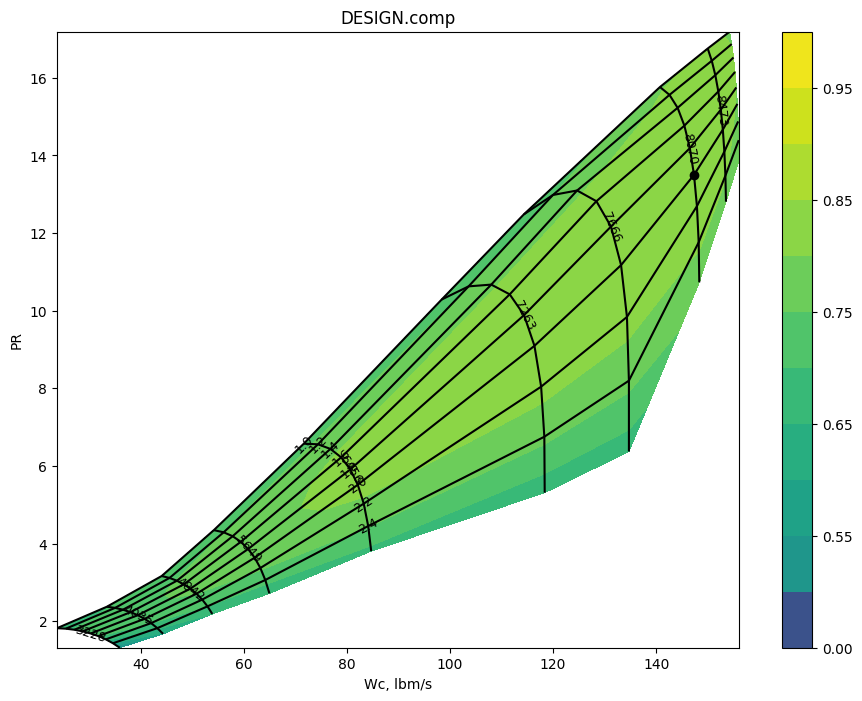

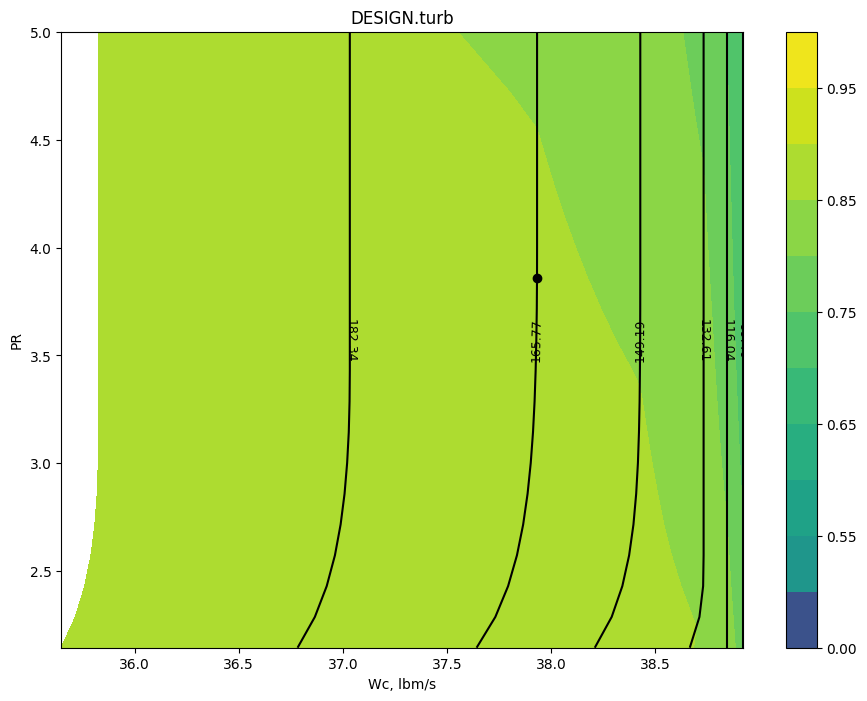

In [2]:
"""
    On-Design and Off-Design Cycles for NASA advanced technology high bypass turbofan engine known as N+3 Engine.
    The N+3 cycle is a notional high bypass ratio geared turbofan that could be available in 2030-40 timeframe.
    
    The cycle has advanced features: includes a low pressure ratio fan to enable high bypass ratio,
    which further requires a variable area fan nozzle to maintain fan stability thoroughout the flight envelope.
    
    Baseline design has a overall pressure ratio of 55 with max allowable combustor temperature of 3400 [degR] or 0.56 * 3400 [K],
    and the low pressure turbine is uncooled.
    
    The cycle is modeled as a multi-design point (fancy word is MDP) taht considers four flight conditions simultaneously.
    
    On-design mode is computed around reference flight condition, usually sea-level-static (SLS) and top-of-climb (TOC),
    where the compressor pressure ratios, combustor temperatures and shaft speeds are specified.
    For the current N+3 being studied TOC condition with Mach Number of 0.85 and altitude of 35,000 [ft].
    The on-design mode iwll calculate physica l design vlaues such as flow area,
    compressor and turbine map scalars that are constant for cycle at all operating conditions.
    
    is On-design mode like an extreme case and then the extreme case values are used to set the sizing?
    
    The physical constants from on-design are then fed to off-design calculations.
    
    Need to add information about the on-design mode and off-design modes tested here further.
    
    Ref: Hendricks and Gray 2019
    """


import sys

import openmdao.api as om

import pycycle.api as pyc


class Turbojet(pyc.Cycle):

    def setup(self):

        # CEA and TABULAR are thermodynamic packages.
        # Apparently TABULAR thermodynamic is simple and easier to run but is fuel specific and in a specific temperature range. Therefore, if one uses a different fuel, the thermo_data has to be generated again.
        # Right now, the thermo_data is pregenerated for Jet-A fuel with only fuel (no water) injection.
        
        USE_TABULAR = True

        if USE_TABULAR: 
            self.options['thermo_method'] = 'TABULAR'
            # Uses a pregenerated thermo data file for fuel JET-A with only fuel (no water) injection
            self.options['thermo_data'] = pyc.AIR_JETA_TAB_SPEC
            # Still confused about what this means. Does it mean fuel air mixture? and How is it connected to other stuff and Where is it connected to?
            FUEL_TYPE = "FAR"
        else: 
            self.options['thermo_method'] = 'CEA'
            # There is a species_data.py file in the pycycle/thermo/cea folder which seems to calculate the Enthalpy [], Entropy [], Specific heat capacity at constant pressure []. Janaf file is in the pycycle/thermo/janaf folder and has all the coefficients the species_data file needs to calculate the thermodynamic properties.
            self.options['thermo_data'] = pyc.species_data.janaf
            # How is it connected to other stuff and Where is it connected to?
            FUEL_TYPE = "Jet-A(g)"

       # For now, thinking that design is a dummy variable dictionary. But not sure. Perhaps reading more code helps.
        design = self.options['design']

        # Add engine elements
        self.add_subsystem('fc', pyc.FlightConditions())
        
        # Withing Inlet, there are few components namely: flow_in (flow_in.py), calc_inlet (within inlet.py), tab ()
        
        # TODO Further explore the inlet component and understand for both design and off-design cases
        self.add_subsystem('inlet', pyc.Inlet())
        # TODO Learning compressor connections is a mess. Somehow some of the subsystems listed in code dont appear on N2 diagram.
        self.add_subsystem('comp', pyc.Compressor(map_data=pyc.AXI5, map_extrap=True),
                                    promotes_inputs=['Nmech'])
        self.add_subsystem('burner', pyc.Combustor(fuel_type=FUEL_TYPE))
        self.add_subsystem('turb', pyc.Turbine(map_data=pyc.LPT2269),
                                    promotes_inputs=['Nmech'])
        self.add_subsystem('nozz', pyc.Nozzle(nozzType='CD', lossCoef='Cv'))
        self.add_subsystem('shaft', pyc.Shaft(num_ports=2),promotes_inputs=['Nmech'])
        self.add_subsystem('perf', pyc.Performance(num_nozzles=1, num_burners=1))

        # Connect flow stations
        self.pyc_connect_flow('fc.Fl_O', 'inlet.Fl_I', connect_w=False)
        self.pyc_connect_flow('inlet.Fl_O', 'comp.Fl_I')
        self.pyc_connect_flow('comp.Fl_O', 'burner.Fl_I')
        self.pyc_connect_flow('burner.Fl_O', 'turb.Fl_I')
        self.pyc_connect_flow('turb.Fl_O', 'nozz.Fl_I')

        # Make other non-flow connections
        # Connect turbomachinery elements to shaft
        self.connect('comp.trq', 'shaft.trq_0')
        self.connect('turb.trq', 'shaft.trq_1')

        # Connnect nozzle exhaust to freestream static conditions
        self.connect('fc.Fl_O:stat:P', 'nozz.Ps_exhaust')

        # Connect outputs to perfomance element
        self.connect('inlet.Fl_O:tot:P', 'perf.Pt2')
        self.connect('comp.Fl_O:tot:P', 'perf.Pt3')
        self.connect('burner.Wfuel', 'perf.Wfuel_0')
        self.connect('inlet.F_ram', 'perf.ram_drag')
        self.connect('nozz.Fg', 'perf.Fg_0')

        # Add balances for design and off-design
        balance = self.add_subsystem('balance', om.BalanceComp())
        if design:

            balance.add_balance('W', units='lbm/s', eq_units='lbf', rhs_name='Fn_target')
            self.connect('balance.W', 'inlet.Fl_I:stat:W')
            self.connect('perf.Fn', 'balance.lhs:W')

            balance.add_balance('FAR', eq_units='degR', lower=1e-4, val=.017, rhs_name='T4_target')
            self.connect('balance.FAR', 'burner.Fl_I:FAR')
            self.connect('burner.Fl_O:tot:T', 'balance.lhs:FAR')

            balance.add_balance('turb_PR', val=1.5, lower=1.001, upper=8, eq_units='hp', rhs_val=0.)
            self.connect('balance.turb_PR', 'turb.PR')
            self.connect('shaft.pwr_net', 'balance.lhs:turb_PR')

        else:

            balance.add_balance('FAR', eq_units='lbf', lower=1e-4, val=.3, rhs_name='Fn_target')
            self.connect('balance.FAR', 'burner.Fl_I:FAR')
            self.connect('perf.Fn', 'balance.lhs:FAR')

            balance.add_balance('Nmech', val=1.5, units='rpm', lower=500., eq_units='hp', rhs_val=0.)
            self.connect('balance.Nmech', 'Nmech')
            self.connect('shaft.pwr_net', 'balance.lhs:Nmech')

            balance.add_balance('W', val=168.0, units='lbm/s', eq_units='inch**2')
            self.connect('balance.W', 'inlet.Fl_I:stat:W')
            self.connect('nozz.Throat:stat:area', 'balance.lhs:W')

       
        newton = self.nonlinear_solver = om.NewtonSolver()
        newton.options['atol'] = 1e-6
        newton.options['rtol'] = 1e-6
        newton.options['iprint'] = 2
        newton.options['maxiter'] = 15
        newton.options['solve_subsystems'] = True
        newton.options['max_sub_solves'] = 100
        newton.options['reraise_child_analysiserror'] = False
        
        self.linear_solver = om.DirectSolver()

        super().setup()

def viewer(prob, pt, file=sys.stdout):
    """
    print a report of all the relevant cycle properties
    """

    summary_data = (prob[pt+'.fc.Fl_O:stat:MN'], prob[pt+'.fc.alt'], prob[pt+'.inlet.Fl_O:stat:W'], 
                    prob[pt+'.perf.Fn'], prob[pt+'.perf.Fg'], prob[pt+'.inlet.F_ram'],
                    prob[pt+'.perf.OPR'], prob[pt+'.perf.TSFC'])

    print(file=file, flush=True)
    print(file=file, flush=True)
    print(file=file, flush=True)
    print("----------------------------------------------------------------------------", file=file, flush=True)
    print("                              POINT:", pt, file=file, flush=True)
    print("----------------------------------------------------------------------------", file=file, flush=True)
    print("                       PERFORMANCE CHARACTERISTICS", file=file, flush=True)
    print("    Mach      Alt       W      Fn      Fg    Fram     OPR     TSFC  ", file=file, flush=True)
    print(" %7.5f  %7.1f %7.3f %7.1f %7.1f %7.1f %7.3f  %7.5f" %summary_data, file=file, flush=True)


    fs_names = ['fc.Fl_O', 'inlet.Fl_O', 'comp.Fl_O', 'burner.Fl_O',
                'turb.Fl_O', 'nozz.Fl_O']
    fs_full_names = [f'{pt}.{fs}' for fs in fs_names]
    pyc.print_flow_station(prob, fs_full_names, file=file)

    comp_names = ['comp']
    comp_full_names = [f'{pt}.{c}' for c in comp_names]
    pyc.print_compressor(prob, comp_full_names, file=file)

    pyc.print_burner(prob, [f'{pt}.burner'])

    turb_names = ['turb']
    turb_full_names = [f'{pt}.{t}' for t in turb_names]
    pyc.print_turbine(prob, turb_full_names, file=file)

    noz_names = ['nozz']
    noz_full_names = [f'{pt}.{n}' for n in noz_names]
    pyc.print_nozzle(prob, noz_full_names, file=file)

    shaft_names = ['shaft']
    shaft_full_names = [f'{pt}.{s}' for s in shaft_names]
    pyc.print_shaft(prob, shaft_full_names, file=file)

def map_plots(prob, pt):
    comp_names = ['comp']
    comp_full_names = [f'{pt}.{c}' for c in comp_names]
    pyc.plot_compressor_maps(prob, comp_full_names)

    turb_names = ['turb']
    turb_full_names = [f'{pt}.{c}' for c in turb_names]
    pyc.plot_turbine_maps(prob, turb_full_names)



class MPTurbojet(pyc.MPCycle):

    def setup(self):

        # Create design instance of model
        self.pyc_add_pnt('DESIGN', Turbojet())

        # Design.Nmech is set at 8070 rpm
        self.set_input_defaults('DESIGN.Nmech', 8070.0, units='rpm')
        # MN means Mach Number        
        self.set_input_defaults('DESIGN.inlet.MN', 0.60)
        self.set_input_defaults('DESIGN.comp.MN', 0.020)#.2
        self.set_input_defaults('DESIGN.burner.MN', 0.020)#.2
        self.set_input_defaults('DESIGN.turb.MN', 0.4)

        self.pyc_add_cycle_param('burner.dPqP', 0.03)
        self.pyc_add_cycle_param('nozz.Cv', 0.99)

        
        # define the off-design conditions (2 in number) we want to run
        self.od_pts = ['OD0', 'OD1']
        # Target Mach numbers in [~]
        self.od_MNs = [0.000001, 0.2]
        # Target Altitude in [ft]
        self.od_alts = [0.0, 5000]
        # Target Forces in [lbF]
        self.od_Fns =[11000.0, 8000.0]

        for i,pt in enumerate(self.od_pts):
            self.pyc_add_pnt(pt, Turbojet(design=False))
            
            self.set_input_defaults(pt+'.fc.MN', val=self.od_MNs[i])
            self.set_input_defaults(pt+'.fc.alt', self.od_alts[i], units='ft')
            self.set_input_defaults(pt+'.balance.Fn_target', self.od_Fns[i], units='lbf')  

        self.pyc_use_default_des_od_conns()

        self.pyc_connect_des_od('nozz.Throat:stat:area', 'balance.rhs:W')

        super().setup()

if __name__ == "__main__":

    import time

    prob = om.Problem()


    mp_turbojet = prob.model = MPTurbojet()

    # prob.model.set_order(['DESIGN', 'OD0', 'OD1', 'test')
    # OpenMDAO command to check the problem setup
    prob.setup(check=False)

    #Define the design points variables
    prob.set_val('DESIGN.fc.alt', 0, units='ft') #Altitude
    prob.set_val('DESIGN.fc.MN', 0.000001) #Mach Number
    prob.set_val('DESIGN.balance.Fn_target', 11800.0, units='lbf') #Target Force
    prob.set_val('DESIGN.balance.T4_target', 2370.0, units='degR') #Target Temperature that shouldn't be exceeded
    prob.set_val('DESIGN.comp.PR', 13.5)  #Pressure Ratio in Compressor
    prob.set_val('DESIGN.comp.eff', 0.83) #Compressor efficiency
    prob.set_val('DESIGN.turb.eff', 0.86) #Turbine efficienc

    # Set initial guesses for balances
    prob['DESIGN.balance.FAR'] = 0.0175506829934 #Fuel-Air Ratio
    prob['DESIGN.balance.W'] = 168.453135137 
    prob['DESIGN.balance.turb_PR'] = 4.46138725662
    prob['DESIGN.fc.balance.Pt'] = 14.6955113159
    prob['DESIGN.fc.balance.Tt'] = 518.665288153

    
    # Define the off-design initial conditions
    for i,pt in enumerate(mp_turbojet.od_pts):

        # initial guesses
        prob[pt+'.balance.W'] = 166.073
        prob[pt+'.balance.FAR'] = 0.01680
        prob[pt+'.balance.Nmech'] = 8197.38
        prob[pt+'.fc.balance.Pt'] = 15.703
        prob[pt+'.fc.balance.Tt'] = 558.31
        prob[pt+'.turb.PR'] = 4.6690

    # Just trying to measure the amount of time taken for the problem to run. `st` means the start time.
    st = time.time()

    #Printing the levels of output
    #prob.set_solver_print(level=-1) #Commented out because the next line overrides this one
    prob.set_solver_print(level=2, depth=1)

    # prob.model.OD1.nonlinear_solver.options['maxiter'] = 1

    prob.run_model()

    # prob.model.OD1.list_outputs(residuals=True)
    # exit()

    for pt in ['DESIGN']+mp_turbojet.od_pts:
        viewer(prob, pt)

    map_plots(prob,'DESIGN')
      #This is where the time between start and current time is printed i.e. time.time() is current time at this line and st is the recorded value previously.
    print()
    print("time", time.time() - st)

The automatic connection between design and off-design points is a feature provided by the PyCycle library, which is an extension of OpenMDAO tailored for thermodynamic cycle analysis. The method self.pyc_use_default_des_od_conns() is likely a wrapper function that sets up these connections based on some predefined rules or conventions.

Here's a simplified explanation of how it might work:
Behind the Scenes

When you call self.pyc_use_default_des_od_conns(), the method likely iterates through all the variables in the design point and matches them with corresponding variables in each off-design point. This is often done based on the variable names and their roles in the model.
Example

Let's say you have a compressor efficiency variable in the design point, named DESIGN.comp.eff. The method would automatically find the corresponding compressor efficiency variable in each off-design point, perhaps named OD0.comp.eff, OD1.comp.eff, etc., and connect them.

In [ ]:
# def pyc_use_default_des_od_conns(self):
#     for var_name, var_value in self.DESIGN.variables.items():
#         print(f"Design Variable: {var_name}, Value: {var_value}")
#         for od_point in self.od_pts:
#             od_var_name = f"{od_point}.{var_name.split('.')[-1]}"
#             print(f"Connecting {var_name} to {od_var_name}")
#             self.connect(f"DESIGN.{var_name}", f"{od_var_name}")

## Output for above code function
# Design Variable: comp.eff, Value: 0.8
# Connecting comp.eff to OD0.eff
# Connecting comp.eff to OD1.eff
# Design Variable: turb.eff, Value: 0.85
# Connecting turb.eff to OD0.eff
# Connecting turb.eff to OD1.eff


In [8]:
import omxdsm

omxdsm.run_xdsm(prob, filename='xdsm_diagram', out_format='html')

AttributeError: module 'omxdsm' has no attribute 'run_xdsm'

In [3]:
pip install omxdsm@https://github.com/onodip/OpenMDAO-XDSM/tarball/master

     | 450.6 kB 2.1 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for pyxdsm from https://files.pythonhosted.org/packages/1e/93/71241cd83c3c5c1488d9238580e2b0ce5a83b0b12c7f41c3dfe94122ddaa/pyXDSM-2.3.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
Using cached pyXDSM-2.3.0-py3-none-any.whl (15 kB)
  Created wheel for omxdsm: filename=omxdsm-1.0-py3-none-any.whl size=32971 sha256=188044eee14dba67f6e5df680f590b0570e5af3502c93974e8da38afbae5a768
  Stored in directory: /private/var/folders/0q/06xg6g2s27sgyxhntplbnh9w0000gn/T/pip-ephem-wheel-cache-q3vf34ce/wheels/d0/dd/21/7517c1627a0f4b2f0cc094e7cb875da922a337f38f76c2956a
  Created wheel for xdsmjs: filename=xdsmjs-2.0.0-py3-none-any.whl size=28527 sha256=aa9c0f45d15837db38c991eac3860b118ac2e7d9213ed61b47259eddd60fd34c
  Stored in directory: /Users/h1he2li3/Library/Caches/pip/wheels/f7/dd/a3/e60beea1138b34b86a0f45b2c251e47eeb93557add7b0aaf17
Successfully built omxdsm xdsmjs
Not

In [6]:
from omxdsm import write_xdsm 
 
 # Write output. PDF will only be created, if pdflatex is installed
write_xdsm(
    prob,
    filename='sellar_pyxdsm',  # Output files will be saved into the same folder as this script
    out_format='pdf',  # Change to 'html' to use XDSMjs
    show_browser=True,
    quiet=False,
    output_side='left',
    include_indepvarcomps=False,  # Recommended to keep it false for clarity
    class_names='short'  # Set to False to turn off class names
)

KeyError: 'DESIGN@comp@map@stall@R'